In [24]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [25]:
type(data)

dict

In [26]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10864,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19650487.00000,19650487.00000,False,NaN,1,NaN,NaN,None,2024-03-10T20:01:00.000Z,69511.07635,32889560522.48830,13.46330,0.20234,1.63735,10.71580,46.15179,49.62702,70.74264,1365926502084.78613,52.02280,1459732603257.13989,None,2024-03-10T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:31:41.132383
1,1027,Ethereum,ETH,ethereum,8522,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120101802.27179,120101802.27179,True,NaN,2,NaN,NaN,None,2024-03-10T20:01:00.000Z,3903.81707,14207979855.47326,2.53450,0.03756,0.26928,12.53839,56.90255,57.84125,78.69916,468855465647.71503,17.85690,468855465647.71997,None,2024-03-10T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:31:41.132383
2,825,Tether USDt,USDT,tether,77642,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,101818633001.26607,106797122778.30690,True,NaN,3,NaN,NaN,None,2024-03-10T20:00:00.000Z,1.00178,73456507963.57907,3.70450,-0.01981,-0.05613,0.12051,0.13512,0.11637,0.28212,102000000887.78847,3.88480,106987358768.25999,None,2024-03-10T20:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-11 01:31:41.132383
3,1839,BNB,BNB,bnb,2087,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149540111.55852,149540111.55852,False,NaN,4,NaN,NaN,None,2024-03-10T20:00:00.000Z,531.04217,4239680702.61740,70.72960,0.58779,9.76601,28.33011,64.36495,78.32616,121.68060,79412106086.67462,3.02450,79412106086.67000,None,2024-03-10T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:31:41.132383
4,5426,Solana,SOL,solana,636,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,443243301.29215,571532436.27257,True,NaN,5,NaN,NaN,None,2024-03-10T20:01:00.000Z,145.33291,3240970000.12747,-1.65250,0.25470,-0.26580,11.58721,38.34598,50.67911,109.78005,64417840077.12276,2.45340,83062473750.57001,None,2024-03-10T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:31:41.132383
5,52,XRP,XRP,xrp,1245,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54736825690.00000,99987824103.00000,False,NaN,6,NaN,NaN,None,2024-03-10T20:01:00.000Z,0.61299,1441554520.04300,-9.52850,-0.16269,-1.35355,-2.23779,16.52777,5.78451,0.20757,33553340759.46380,1.27790,61299390924.66000,None,2024-03-10T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:31:41.132383
6,3408,USDC,USDC,usd-coin,17135,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30142368819.73223,30142368819.73223,False,NaN,7,NaN,NaN,None,2024-03-10T20:01:00.000Z,0.99993,6691684154.21412,3.77280,-0.01458,-0.01013,-0.00898,-0.00722,-0.05689,0.00209,30140333429.70417,1.14790,30140333429.70000,None,2024-03-10T20:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-11 01:31:41.132383
7,2010,Cardano,ADA,cardano,1091,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35498763107.97800,36685854736.85100,False,NaN,8,NaN,NaN,None,2024-03-10T20:00:00.000Z,0.72052,616398222.16439,-4.18670,0.34255,-2.76165,-0.75727,32.89290,39.33072,35.44512,25577576360.31417,0.97390,32423409590.73000,None,2024-03-10T20:00:00.000

In [28]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')


In [52]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

AttributeError: 'DataFrame' object has no attribute 'append'

In [48]:
#df72 = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')
#df72

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10864,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19650487.00000,19650487.00000,False,NaN,1,NaN,NaN,None,2024-03-10T19:43:00.000Z,69419.92346,32900378178.24156,11.16480,-0.07404,1.59424,10.65999,45.72938,49.97945,71.61391,1364135303437.76758,52.01370,1457818392602.34009,None,2024-03-10T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:13:55.203890
1,1027,Ethereum,ETH,ethereum,8522,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120101802.27179,120101802.27179,True,NaN,2,NaN,NaN,None,2024-03-10T19:43:00.000Z,3906.15158,14227272709.78907,1.36140,-0.23660,0.25110,12.57065,56.84375,57.70943,79.83171,469135844515.57385,17.88790,469135844515.57001,None,2024-03-10T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:13:55.203890
2,825,Tether USDt,USDT,tether,77641,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,101818633001.26607,106797122778.30690,True,NaN,3,NaN,NaN,None,2024-03-10T19:42:00.000Z,1.00174,73450306926.53392,3.04890,-0.01157,-0.05354,0.11710,0.12543,0.12662,0.28678,101996208734.88863,3.88910,106983381195.53000,None,2024-03-10T19:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-11 01:13:55.203890
3,1839,BNB,BNB,bnb,2087,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149540111.55852,149540111.55852,False,NaN,4,NaN,NaN,None,2024-03-10T19:42:00.000Z,529.82788,4226899742.62530,69.14610,0.17834,9.39689,27.98232,64.07273,78.49612,123.48886,79230520530.44504,3.02100,79230520530.45000,None,2024-03-10T19:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:13:55.203890
4,5426,Solana,SOL,solana,636,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,443243301.29215,571532436.27257,True,NaN,5,NaN,NaN,None,2024-03-10T19:43:00.000Z,145.14524,3237886674.44656,-2.55900,0.19316,-0.54214,11.27448,37.40549,51.90427,111.73369,64334654584.75964,2.45300,82955211651.00999,None,2024-03-10T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:13:55.203890
5,52,XRP,XRP,xrp,1245,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54736825690.00000,99987824103.00000,False,NaN,6,NaN,NaN,None,2024-03-10T19:43:00.000Z,0.61269,1444124026.08710,-9.63780,-0.45024,-1.77782,-2.58668,16.50572,6.41070,1.10434,33536449188.40995,1.27870,61268531314.44000,None,2024-03-10T19:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:13:55.203890
6,3408,USDC,USDC,usd-coin,17134,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30142368819.73223,30142368819.73223,False,NaN,7,NaN,NaN,None,2024-03-10T19:43:00.000Z,0.99992,6695198468.68219,2.73550,-0.00270,-0.00804,-0.00983,-0.03453,-0.01893,0.00068,30140034180.04615,1.14920,30140034180.05000,None,2024-03-10T19:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-11 01:13:55.203890
7,2010,Cardano,ADA,cardano,1091,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35498763107.97800,36685854736.85100,False,NaN,8,NaN,NaN,None,2024-03-10T19:42:00.000Z,0.71830,617705004.45441,-4.16780,-0.10313,-3.44895,-1.29647,32.44707,40.24186,36.81053,25498611113.67054,0.97250,32323309311.51000,None,2024-03-10T19:42:00.

In [35]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [36]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10864,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19650487.00000,19650487.00000,False,NaN,1,NaN,NaN,None,2024-03-10T20:01:00.000Z,69511.07635,32889560522.48830,13.46330,0.20234,1.63735,10.71580,46.15179,49.62702,70.74264,1365926502084.78613,52.02280,1459732603257.13989,None,2024-03-10T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:31:41.132383
1,1027,Ethereum,ETH,ethereum,8522,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120101802.27179,120101802.27179,True,NaN,2,NaN,NaN,None,2024-03-10T20:01:00.000Z,3903.81707,14207979855.47326,2.53450,0.03756,0.26928,12.53839,56.90255,57.84125,78.69916,468855465647.71503,17.85690,468855465647.71997,None,2024-03-10T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:31:41.132383
2,825,Tether USDt,USDT,tether,77642,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,101818633001.26607,106797122778.30690,True,NaN,3,NaN,NaN,None,2024-03-10T20:00:00.000Z,1.00178,73456507963.57907,3.70450,-0.01981,-0.05613,0.12051,0.13512,0.11637,0.28212,102000000887.78847,3.88480,106987358768.25999,None,2024-03-10T20:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-03-11 01:31:41.132383
3,1839,BNB,BNB,bnb,2087,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149540111.55852,149540111.55852,False,NaN,4,NaN,NaN,None,2024-03-10T20:00:00.000Z,531.04217,4239680702.61740,70.72960,0.58779,9.76601,28.33011,64.36495,78.32616,121.68060,79412106086.67462,3.02450,79412106086.67000,None,2024-03-10T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:31:41.132383
4,5426,Solana,SOL,solana,636,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,443243301.29215,571532436.27257,True,NaN,5,NaN,NaN,None,2024-03-10T20:01:00.000Z,145.33291,3240970000.12747,-1.65250,0.25470,-0.26580,11.58721,38.34598,50.67911,109.78005,64417840077.12276,2.45340,83062473750.57001,None,2024-03-10T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:31:41.132383
5,52,XRP,XRP,xrp,1245,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54736825690.00000,99987824103.00000,False,NaN,6,NaN,NaN,None,2024-03-10T20:01:00.000Z,0.61299,1441554520.04300,-9.52850,-0.16269,-1.35355,-2.23779,16.52777,5.78451,0.20757,33553340759.46380,1.27790,61299390924.66000,None,2024-03-10T20:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-03-11 01:31:41.132383
6,3408,USDC,USDC,usd-coin,17135,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,30142368819.73223,30142368819.73223,False,NaN,7,NaN,NaN,None,2024-03-10T20:01:00.000Z,0.99993,6691684154.21412,3.77280,-0.01458,-0.01013,-0.00898,-0.00722,-0.05689,0.00209,30140333429.70417,1.14790,30140333429.70000,None,2024-03-10T20:01:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-03-11 01:31:41.132383
7,2010,Cardano,ADA,cardano,1091,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35498763107.97800,36685854736.85100,False,NaN,8,NaN,NaN,None,2024-03-10T20:00:00.000Z,0.72052,616398222.16439,-4.18670,0.34255,-2.76165,-0.75727,32.89290,39.33072,35.44512,25577576360.31417,0.97390,32423409590.73000,None,2024-03-10T20:00:00.000

In [37]:

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.20234,1.63735,10.71580,46.15179,49.62702,70.74264
Ethereum,0.03756,0.26928,12.53839,56.90255,57.84125,78.69916
Tether USDt,-0.01981,-0.05613,0.12051,0.13512,0.11637,0.28212
BNB,0.58779,9.76601,28.33011,64.36495,78.32616,121.68060
Solana,0.25470,-0.26580,11.58721,38.34598,50.67911,109.78005
XRP,-0.16269,-1.35355,-2.23779,16.52777,5.78451,0.20757
USDC,-0.01458,-0.01013,-0.00898,-0.00722,-0.05689,0.00209
Cardano,0.34255,-2.76165,-0.75727,32.89290,39.33072,35.44512
Dogecoin,0.62474,-2.03843,15.21308,113.41570,119.54279,85.53109


In [38]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.20234
             quote.USD.percent_change_24h     1.63735
             quote.USD.percent_change_7d     10.71580
             quote.USD.percent_change_30d    46.15179
             quote.USD.percent_change_60d    49.62702
             quote.USD.percent_change_90d    70.74264
Ethereum     quote.USD.percent_change_1h      0.03756
             quote.USD.percent_change_24h     0.26928
             quote.USD.percent_change_7d     12.53839
             quote.USD.percent_change_30d    56.90255
             quote.USD.percent_change_60d    57.84125
             quote.USD.percent_change_90d    78.69916
Tether USDt  quote.USD.percent_change_1h     -0.01981
             quote.USD.percent_change_24h    -0.05613
             quote.USD.percent_change_7d      0.12051
             quote.USD.percent_change_30d     0.13512
             quote.USD.percent_change_60d     0.11637
             quote.USD.percent_change_90

In [39]:
type(df4)

pandas.core.series.Series

In [40]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.20234
            quote.USD.percent_change_24h   1.63735
            quote.USD.percent_change_7d   10.71580
            quote.USD.percent_change_30d  46.15179
            quote.USD.percent_change_60d  49.62702
            quote.USD.percent_change_90d  70.74264
Ethereum    quote.USD.percent_change_1h    0.03756
            quote.USD.percent_change_24h   0.26928
            quote.USD.percent_change_7d   12.53839
            quote.USD.percent_change_30d  56.90255
            quote.USD.percent_change_60d  57.84125
            quote.USD.percent_change_90d  78.69916
Tether USDt quote.USD.percent_change_1h   -0.01981
            quote.USD.percent_change_24h  -0.05613
            quote.USD.percent_change_7d    0.12051
            quote.USD.percent_change_30d   0.13512
            quote.USD.percent_change_60d   0.11637
            quote.USD.percent_change_90d   0.28212
BNB         quote.USD.percent_change_1h    0.58779
            quote.USD.percent_change_24h   9.76601
            quote.USD.percent_change_7d   28.33011
            quote.USD.percent_change_30d  64.36495
            quote.USD.percent_change_60d  78.32616
            quote.USD.percent_change_90d 121.68060
Solana      quote.USD.percent_change_1h    0.25470
            quote.USD.percent_change_24h  -0.26580
            quote.USD.percent_change_7d   11.58721
            quote.USD.percent_change_30d  38.34598
            quote.USD.percent_change_60d  50.67911
            quote.USD.percent_change_90d 109.78005
XRP         quote.USD.percent_change_1h   -0.16269
            quote.USD.percent_change_24h  -1.35355
            quote.USD.percent_change_7d   -2.23779
            quote.USD.percent_change_30d  16.52777
            quote.USD.percent_change_60d   5.78451
            quote.USD.percent_change_90d   0.20757
USDC        quote.USD.percent_change_1h   -0.01458
            quote.USD.percent_change_24h  -0.01013
            quote.USD.percent_change_7d   -0.00898
            quote.USD.percent_change_30d  -0.00722
            quote.USD.percent_change_60d  -0.05689
            quote.USD.percent_change_90d   0.00209
Cardano     quote.USD.percent_change_1h    0.34255
            quote.USD.percent_change_24h  -2.76165
            quote.USD.percent_change_7d   -0.75727
            quote.USD.percent_change_30d  32.89290
            quote.USD.percent_change_60d  39.33072
            quote.USD.percent_change_90d  35.44512
Dogecoin    quote.USD.percent_change_1h    0.62474
            quote.USD.percent_change_24h  -2.03843
            quote.USD.percent_change_7d   15.21308
            quote.USD.percent_change_30d 113.41570
            quote.USD.percent_change_60d 119.54279
            quote.USD.percent_change_90d  85.53109
Shiba Inu   quote.USD.percent_change_1h   -0.05815
            quote.USD.percent_change_24h  -4.12135
            quote.USD.percent_change_7d   53.87856
            quote.USD.percent_change_30d 259.94720
            quote.USD.percent_change_60d 253.41158
            quote.USD.percent_change_90d 260.72901
Avalanche   quote.USD.percent_change_1h    0.48333
            quote.USD.percent_change_24h  -1.64760
            quote.USD.percent_change_7d   -0.69528
            quote.USD.percent_change_30d  11.00325
            quote.USD.percent_change_60d  19.46322
            quote.USD.percent_change_90d  14.96451
Polkadot    quote.USD.percent_change_1h    0.21830
            quote.USD.percent_change_24h  -1.61057
            quote.USD.percent_change_7d    6.72846
            quote.USD.percent_change_30d  44.00605
            quote.USD.percent_change_60d  41.90626
            quote.USD.percent_change_90d  58.25230
Polygon     quote.USD.percent_change_1h   -0.93834
            quote.USD.percent_change_24h   7.02518
            quote.USD.percent_change_7d   11.99180
            quote.USD.percent_change_30d  43.76442
            quote.USD.percent_change_60d  40.34260
            quo

In [41]:
df5.count()

values    90
dtype: int64

In [42]:

index = pd.Index(range(90))

df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.20234
1,Bitcoin,quote.USD.percent_change_24h,1.63735
2,Bitcoin,quote.USD.percent_change_7d,10.71580
3,Bitcoin,quote.USD.percent_change_30d,46.15179
4,Bitcoin,quote.USD.percent_change_60d,49.62702
5,Bitcoin,quote.USD.percent_change_90d,70.74264
6,Ethereum,quote.USD.percent_change_1h,0.03756
7,Ethereum,quote.USD.percent_change_24h,0.26928
8,Ethereum,quote.USD.percent_change_7d,12.53839
9,Ethereum,quote.USD.percent_change_30d,56.90255


In [43]:

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.20234
1,Bitcoin,quote.USD.percent_change_24h,1.63735
2,Bitcoin,quote.USD.percent_change_7d,10.71580
3,Bitcoin,quote.USD.percent_change_30d,46.15179
4,Bitcoin,quote.USD.percent_change_60d,49.62702
5,Bitcoin,quote.USD.percent_change_90d,70.74264
6,Ethereum,quote.USD.percent_change_1h,0.03756
7,Ethereum,quote.USD.percent_change_24h,0.26928
8,Ethereum,quote.USD.percent_change_7d,12.53839
9,Ethereum,quote.USD.percent_change_30d,56.90255


In [44]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','28h','7d','30d','60d','90d'])
df7


,name,percent_change,values
0,Bitcoin,1h,0.20234
1,Bitcoin,28h,1.63735
2,Bitcoin,7d,10.71580
3,Bitcoin,30d,46.15179
4,Bitcoin,60d,49.62702
5,Bitcoin,90d,70.74264
6,Ethereum,1h,0.03756
7,Ethereum,28h,0.26928
8,Ethereum,7d,12.53839
9,Ethereum,30d,56.90255


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


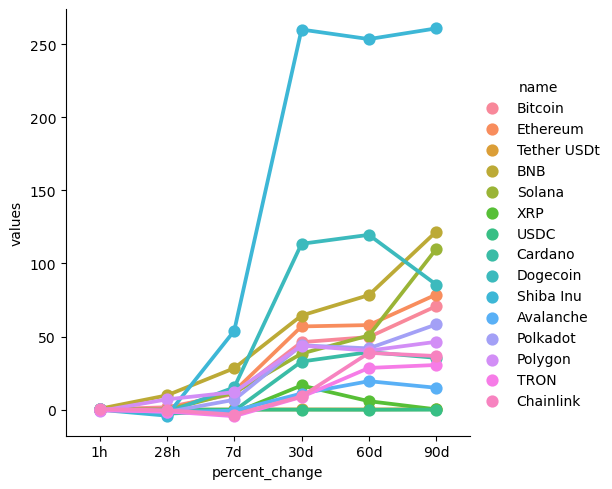

In [46]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [47]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,69511.07635,2024-03-11 01:31:41.132383


In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)